In [1]:
from glob import glob
import cv2
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def load_pics():
    files = glob('vagott/*.bmp')
    files = sorted(files)
    img = cv2.imread(files[0])
    imgs = np.empty((len(files), img.shape[0], img.shape[1]), dtype=np.uint8)
    for i in range(0, len(files)):
        imgs[i,:,:] = cv2.imread(files[i])[:,:,0]
    return imgs

In [3]:
imgs = load_pics()
imgs.shape

(21, 1000, 1000)

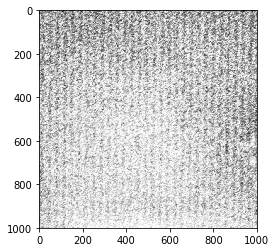

In [4]:
plt.imshow(imgs[0], cmap='gray')

In [5]:
pic = imgs[:, 0:500, 0:500]
pic.shape

(21, 500, 500)

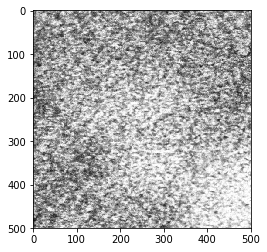

In [6]:
plt.imshow(pic[11], cmap='gray')

In [7]:
I = []
for i in range(len(pic)):
    I.append(np.mean(pic[i], 0))
I = np.array(I)
np.shape(I)

(21, 500)

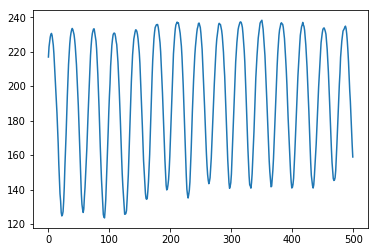

In [8]:
plt.plot(I[20])

In [9]:
min(I[20])

123.528

In [10]:
V = []
for i in range(len(pic)):
    #imax = np.argmax(I[i])
    #Imin = (min(I[i, (imax-100):imax]) + min(I[i, imax:(imax+100)]))/2
    V.append((max(I[i]) - min(I[i]))/(max(I[i]) + min(I[i])))
V = np.array(V)
np.shape(V)

(21,)

In [11]:
V

array([0.08760024, 0.05537428, 0.10689996, 0.1441345 , 0.2262833 ,
       0.30892406, 0.244703  , 0.29709573, 0.31720485, 0.22477655,
       0.12673894, 0.11121974, 0.04107277, 0.09155478, 0.17003795,
       0.18692748, 0.25546459, 0.30662954, 0.34442791, 0.36697903,
       0.31707587])

In [12]:
V[:10]

array([0.08760024, 0.05537428, 0.10689996, 0.1441345 , 0.2262833 ,
       0.30892406, 0.244703  , 0.29709573, 0.31720485, 0.22477655])

In [13]:
phi = np.array(range(45, -1, -5)) * np.pi/180
alpha = list(range(45, -46, -10))
alpha.insert(5, 0)
alpha = np.array(alpha) * np.pi/180
print(phi)
print(alpha)

[0.78539816 0.6981317  0.61086524 0.52359878 0.43633231 0.34906585
 0.26179939 0.17453293 0.08726646 0.        ]
[ 0.78539816  0.61086524  0.43633231  0.26179939  0.08726646  0.
 -0.08726646 -0.26179939 -0.43633231 -0.61086524 -0.78539816]


In [14]:
cos2phi = np.cos(2 * phi)
cos2alpha = np.cos(2 * alpha)
print(cos2phi)
print(cos2alpha)

[6.12323400e-17 1.73648178e-01 3.42020143e-01 5.00000000e-01
 6.42787610e-01 7.66044443e-01 8.66025404e-01 9.39692621e-01
 9.84807753e-01 1.00000000e+00]
[6.12323400e-17 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 1.00000000e+00 9.84807753e-01 8.66025404e-01
 6.42787610e-01 3.42020143e-01 6.12323400e-17]


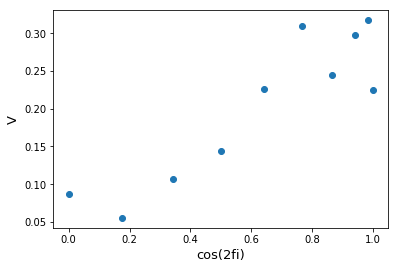

In [15]:
plt.plot(cos2phi, V[:10], marker = 'o', linestyle = '')
plt.xlabel('cos(2fi)', fontsize = 13)
plt.ylabel('V', fontsize = 13)
plt.savefig('V_cos2fi.png')

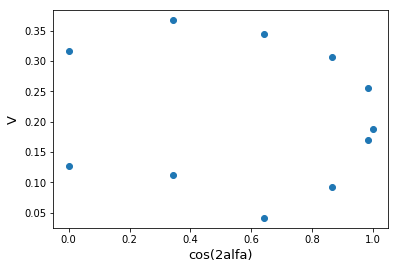

In [16]:
plt.plot(cos2alpha, V[10:], marker = 'o', linestyle = '')
plt.xlabel('cos(2alfa)', fontsize = 13)
plt.ylabel('V', fontsize = 13)
plt.savefig('V_cos2alfa_p.png')

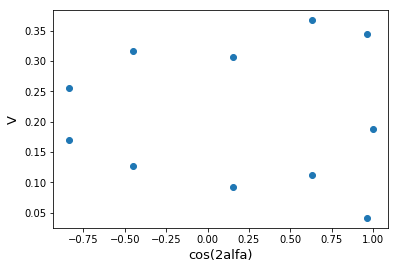

In [17]:
plt.plot(np.cos(2 * alpha *180/np.pi), V[10:], marker = 'o', linestyle = '')
plt.xlabel('cos(2alfa)', fontsize = 13)
plt.ylabel('V', fontsize = 13)
plt.savefig('V_cos2alfa_f.png')

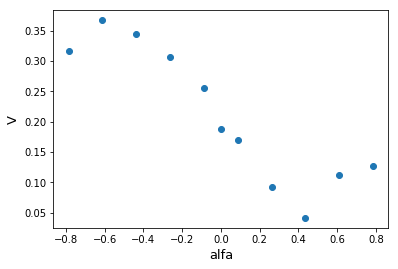

In [18]:
plt.plot(alpha, V[10:], marker = 'o', linestyle = '')
plt.xlabel('alfa', fontsize = 13)
plt.ylabel('V', fontsize = 13)
plt.savefig('V_alfa.png')